

# Importing Libraries

In [ ]:
from sklearn.naive_bayes import GaussianNB
import os
import pandas as pd
import numpy as np
import cv2
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,balanced_accuracy_score
import joblib

# Data Pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cam = '1'

image = '/content/drive/MyDrive/Colab Notebooks/raw/image_1.npy'       
name = '/content/drive/MyDrive/Colab Notebooks/raw/name_1.npy'
label = '/content/drive/MyDrive/Colab Notebooks/raw/label_1.npy'

img_1 = np.load(image)
label_1 = np.load(label)
label_1 = np.reshape(label_1, (label_1.shape[0], ))
name_1 = np.load(name)

cam = '2'

image = '/content/drive/MyDrive/Colab Notebooks/raw/image_2.npy'       
name = '/content/drive/MyDrive/Colab Notebooks/raw/name_2.npy'
label = '/content/drive/MyDrive/Colab Notebooks/raw/label_2.npy'

img_2 = np.load(image)
label_2 = np.load(label)
label_2 = np.reshape(label_2, (label_2.shape[0], ))
name_2 = np.load(name)

In [ ]:
print(img_1.shape)
print(name_1.shape)
print(img_2.shape)
print(name_2.shape)

(294677, 32, 32)
(294677,)
(294677, 32, 32)
(294677,)


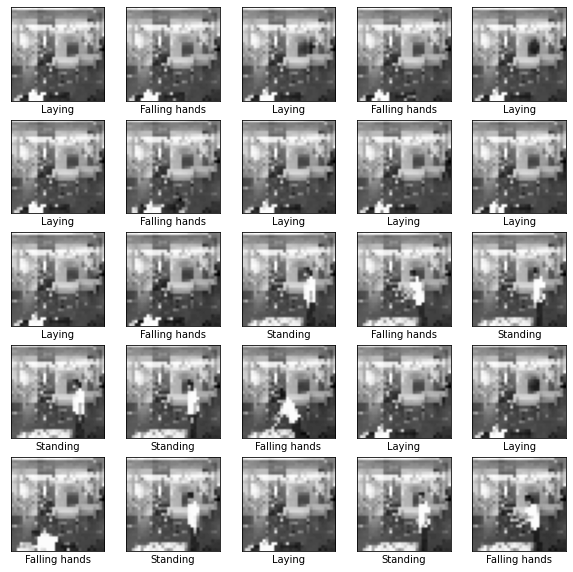

In [ ]:
#Visualizing data

class_name = [    '?????' ,
                'Falling hands' ,
                 'Falling knees' ,
                 'Falling backwards',
                 'Falling sideward' ,
                ' Falling chair',
                ' Walking',
                 'Standing' ,
                 'Sitting' ,
                 'Picking object' ,
                 'Jumping' ,
                 'Laying' ]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_1[i], cmap = 'gray')
    plt.xlabel(class_name[label_1[i]])
plt.show()

In [ ]:
X_train_1,X_rem_1,y_train_1,y_rem_1 = train_test_split(img_1,label_1,
                                                         train_size = 0.6,
                                                         random_state = 42,
                                                         )

X_val_1,X_test_1,y_val_1,y_test_1 = train_test_split(X_rem_1,y_rem_1,
                                                         test_size = 0.5,
                                                         random_state = 42,
                                                         )
print('*'*20)
print('X_train_1 shape : ',X_train_1.shape)
print('X_test_1 shape : ',X_test_1.shape)
print('X_val_1 shape : ',X_val_1.shape)
print('y_train_1 shape : ',y_train_1.shape)
print('y_test_1 shape : ',y_test_1.shape)
print('y_val_1 shape : ',y_val_1.shape)



X_train_2,X_rem_2,y_train_2,y_rem_2 = train_test_split(img_2,label_2,
                                                         train_size = 0.6,
                                                         random_state = 42,
                                                         )

X_val_2,X_test_2,y_val_2,y_test_2 = train_test_split(X_rem_2,y_rem_2,
                                                         test_size = 0.5,
                                                         random_state = 42,
                                                         )

print('*'*20)
print('X_train_2 shape : ',X_train_2.shape)
print('X_test_2 shape : ',X_test_2.shape)
print('X_val_2 shape : ',X_val_2.shape)
print('y_train_2 shape : ',y_train_2.shape)
print('y_test_2 shape : ',y_test_2.shape)
print('y_val_2 shape : ',y_val_2.shape)

********************
X_train_1 shape :  (176806, 32, 32)
X_test_1 shape :  (58936, 32, 32)
X_val_1 shape :  (58935, 32, 32)
y_train_1 shape :  (176806,)
y_test_1 shape :  (58936,)
y_val_1 shape :  (58935,)
********************
X_train_2 shape :  (176806, 32, 32)
X_test_2 shape :  (58936, 32, 32)
X_val_2 shape :  (58935, 32, 32)
y_train_2 shape :  (176806,)
y_test_2 shape :  (58936,)
y_val_2 shape :  (58935,)


In [ ]:
X_train_1_scaled = X_train_1/255.0
X_train_2_scaled = X_train_2/255.0

X_val_1_scaled = X_val_1/255.0
X_val_2_scaled = X_val_2/255.0

X_test_1_scaled = X_test_1/255.0
X_test_2_scaled = X_test_2/255.0

print(X_train_1_scaled.shape)
print(X_test_1_scaled.shape)
print(X_val_1_scaled.shape)

print(X_train_2_scaled.shape)
print(X_test_2_scaled.shape)
print(X_val_2_scaled.shape)

(176806, 32, 32)
(58936, 32, 32)
(58935, 32, 32)
(176806, 32, 32)
(58936, 32, 32)
(58935, 32, 32)


In [ ]:
X_train_1_scaled = np.reshape(X_train_1_scaled, (X_train_1_scaled.shape[0], -1))
X_train_2_scaled = np.reshape(X_train_2_scaled, (X_train_2_scaled.shape[0], -1))
X_val_1_scaled = np.reshape(X_val_1_scaled, (X_val_1_scaled.shape[0], -1))
X_val_2_scaled = np.reshape(X_val_2_scaled, (X_val_2_scaled.shape[0], -1))

In [ ]:
print(X_train_1_scaled.shape)

(176806, 1024)


# Naive Bias


In [ ]:
nb=GaussianNB()
nb.fit(X_train_1_scaled, y_train_1)

GaussianNB()

In [ ]:
y_pred_1 = nb.predict(X_val_1_scaled)

In [14]:
print("Accuracy = " + str(accuracy_score(y_pred_1,y_val_1)))

Accuracy = 0.5601764655976924
